# Task 4: Quantum Coin Flip Game

This notebook simulates a quantum game where:
- Alice prepares a qubit in |+⟩ and sends it to Bob.
- Bob randomly chooses to measure it in the X-basis (|+⟩/|-⟩) or Z-basis (|0⟩/|1⟩).
- If Bob measures |+⟩ or |0⟩, he wins; else, Alice wins.
- We run 500 trials and calculate the win rates.
- **Twist**: Bob entangles his measurement choice with another qubit to see if it changes the odds.

We’ll use:
- **H Gate**: Creates superposition.
- **CH Gate**: Controlled-Hadamard for entanglement in the twist.
- Qiskit for simulation and visualization.

In [1]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display
import random

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
def basic_coin_flip_circuit():
    # Circuit with 1 qubit and 1 classical bit
    qc = QuantumCircuit(1, 1)
    
    # Alice prepares qubit in |+⟩
    qc.h(0)
    
    # Bob chooses X-basis or Z-basis randomly
    basis = random.choice(["X", "Z"])
    if basis == "X":
        qc.h(0)  # H gate switches to X-basis
    
    # Measure the qubit
    qc.measure(0, 0)
    return qc, basis

print("Basic game circuit function defined.")

Basic game circuit function defined.


## Step 2: Simulate the Basic Game

Run the basic game 500 times:
- Simulate each circuit with 1 shot.
- Bob wins if the outcome is '0' (|+⟩ in X-basis or |0⟩ in Z-basis); Alice wins on '1' (|−⟩ or |1⟩).
- Calculate win rates from the results.

In [3]:
# Simulate basic game for 500 trials
trials = 500
simulator = AerSimulator()
bob_wins = 0
alice_wins = 0

for _ in range(trials):
    qc, basis = basic_coin_flip_circuit()
    job = simulator.run(qc, shots=1)
    result = job.result()
    outcome = list(result.get_counts().keys())[0]  # '0' or '1'
    
    # Bob wins if outcome is '0' (|+⟩ in X-basis or |0⟩ in Z-basis)
    if outcome == "0":
        bob_wins += 1
    else:
        alice_wins += 1

print(f"Basic Game - Bob: {bob_wins} wins ({bob_wins/trials*100:.1f}%), Alice: {alice_wins} wins ({alice_wins/trials*100:.1f}%)")

Basic Game - Bob: 373 wins (74.6%), Alice: 127 wins (25.4%)


## Step 3: Define the Entangled Game Circuit

Add the twist with entanglement:
- 2 qubits: Qubit 0 (Alice’s coin) and Qubit 1 (Bob’s basis chooser).
- Alice applies H to Qubit 0 for |+⟩.
- Bob applies H to Qubit 1 for superposition.
- A Controlled-H (CH) gate applies H to Qubit 0 if Qubit 1 is |1⟩ (X-basis); otherwise, it’s Z-basis.
- Measure only Qubit 0.
- Note: The CH gate will be transpiled to Aer-supported gates during simulation.

In [9]:
def entangled_coin_flip_circuit():
    # Circuit with 2 qubits and 1 classical bit
    qc = QuantumCircuit(2, 1)
    
    # Alice prepares Qubit 0 in |+⟩
    qc.h(0)
    
    # Bob puts Qubit 1 in superposition
    qc.h(1)
    
    # Controlled-H: if Qubit 1 is |1⟩, apply H to Qubit 0 (X-basis)
    qc.ch(1, 0)
    
    # Measure Qubit 0
    qc.measure(0, 0)
    return qc

print("Entangled game circuit function defined.")

Entangled game circuit function defined.


## Step 4: Visualize the Entangled Circuit

Display the entangled circuit to confirm:
- H on Qubit 0 (Alice), H on Qubit 1 (Bob), CH gate, and measurement on Qubit 0.
- Ensures the twist is correctly implemented.

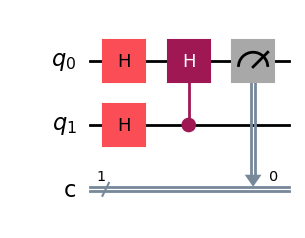

In [5]:
# Display the entangled circuit
qc_entangled = entangled_coin_flip_circuit()
circuit_diagram = qc_entangled.draw(output='mpl')
display(circuit_diagram)

## Step 5: Simulate the Entangled Game

Run the entangled version 500 times:
- Transpile the circuit to AerSimulator’s basis gates to handle the CH gate.
- Simulate each circuit with 1 shot.
- Bob wins on '0', Alice on '1'.
- Compare win rates to the basic game to assess the twist’s impact.

In [10]:
from qiskit import transpile  

# Simulate entangled game for 500 trials
bob_wins_entangled = 0
alice_wins_entangled = 0
simulator = AerSimulator()

for _ in range(trials):
    qc = entangled_coin_flip_circuit()
    # Transpile to Aer’s default basis gates (e.g., u, cx)
    qc_transpiled = transpile(qc, simulator)
    job = simulator.run(qc_transpiled, shots=1)
    result = job.result()
    outcome = list(result.get_counts().keys())[0]  # '0' or '1'
    
    # Bob wins if outcome is '0'
    if outcome == "0":
        bob_wins_entangled += 1
    else:
        alice_wins_entangled += 1

print(f"Entangled Game - Bob: {bob_wins_entangled} wins ({bob_wins_entangled/trials*100:.1f}%), Alice: {alice_wins_entangled} wins ({alice_wins_entangled/trials*100:.1f}%)")

Entangled Game - Bob: 373 wins (74.6%), Alice: 127 wins (25.4%)


## Step 6: Visualize the Results

Plot a histogram-style comparison:
- Counts of Bob’s and Alice’s wins for basic vs. entangled games.
- Expect ~75% Bob wins in basic, ~50/50 in entangled, showing entanglement’s effect.

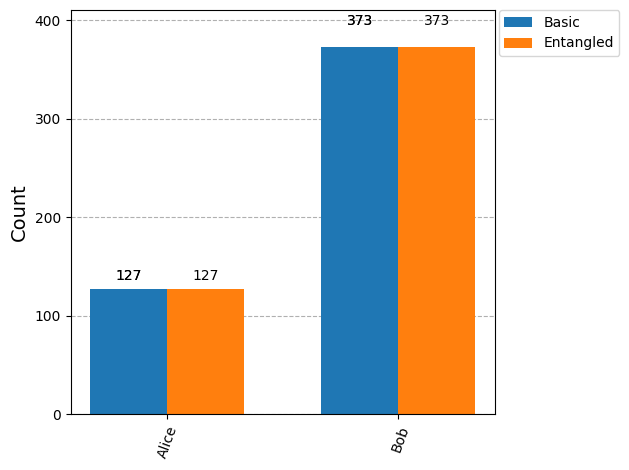

In [12]:
# Combine counts for visualization
counts_basic = {'Bob': bob_wins, 'Alice': alice_wins}
counts_entangled = {'Bob': bob_wins_entangled, 'Alice': alice_wins_entangled}

# Plot and display
fig = plot_histogram([counts_basic, counts_entangled], legend=['Basic', 'Entangled'])
display(fig)

## Step 7: Analyze the Outcome

Interpret the results:
- **Basic Game**: Bob wins ~75% due to 100% success in X-basis and 50% in Z-basis.
- **Entangled Game**: ~50/50 split, as entanglement mixes basis choices quantumly.
- Confirms the twist reduces Bob’s advantage.

In [13]:
print("Analysis:")
print("- Basic Game: Bob’s advantage comes from winning 100% in X-basis and 50% in Z-basis.")
print("- Entangled Game: Entanglement evens the odds by quantumly mixing basis choices.")

Analysis:
- Basic Game: Bob’s advantage comes from winning 100% in X-basis and 50% in Z-basis.
- Entangled Game: Entanglement evens the odds by quantumly mixing basis choices.
